## ***Model Explainability***

*In this notebook, we will leverage SHAP (SHapley Additive exPlanations), a powerful and widely-used explainability tool, to interpret the previously trained and tested models. SHAP provides a unified framework for explaining the output of any machine learning model by attributing the prediction to each feature's contribution.*


In [62]:
#Import required libraries
import pandas as pd
import shap
import pickle
import joblib

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

In [63]:
## Load the dataset
df_fraud = pd.read_csv('../data/transformed_fraud_data.csv')
df_credit_card = pd.read_csv('../data/transformed_credit_card_data.csv')

In [64]:
## Train Test Split
## Feature and Target Separation for both datasets
X_fraud = df_fraud.drop(columns=['class'])
y_fraud = df_fraud['class']

X_credit = df_credit_card.drop(columns=['Class'])
y_credit = df_credit_card['Class']

## 80-20 Training and Test dataset split
## For Fraud Data
X_train_fraud,X_test_fraud,y_train_fraud,y_test_fraud = train_test_split(X_fraud,y_fraud,test_size=0.2, random_state=42,stratify=y_fraud)

## For Credit Card Data
X_train_credit,X_test_credit,y_train_credit,y_test_credit = train_test_split(X_credit,y_credit,test_size=0.2, random_state=42,stratify=y_credit)

In [65]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_fraud_resampled, y_train_fraud_resampled = smote.fit_resample(X_train_fraud, y_train_fraud)
X_train_credit_resampled, y_train_credit_resampled = smote.fit_resample(X_train_credit,y_train_credit)

### ***1. Logistic Regression SHAP***

#### ***1.1 Credit Card Model***

In [66]:
# Load model for credit card data
with open('../data/logistic_credit.pkl', 'rb') as file:
    lgr_credit = pickle.load(file)

100%|██████████| 100/100 [00:57<00:00,  1.75it/s]


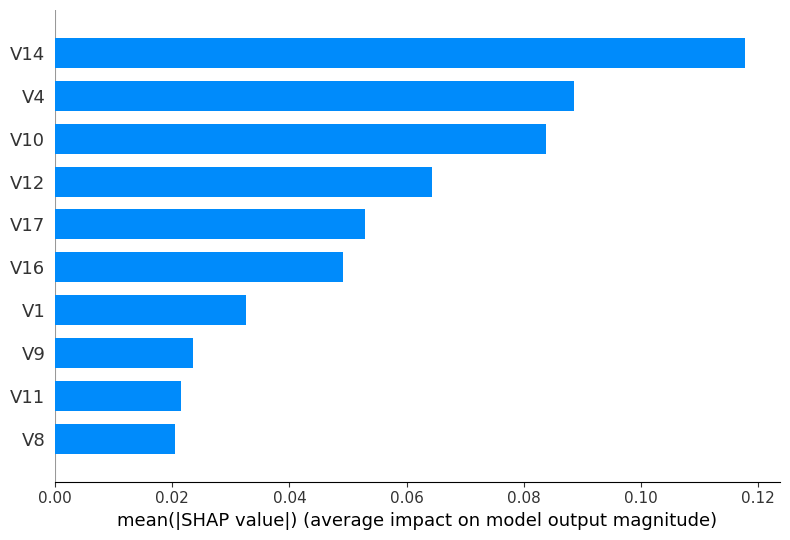

In [67]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_credit_resampled, 100)  # Or use shap.kmeans(X_train_fraud_resampled, 100)

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(lgr_credit.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_credit[:100])  # Limit to the first 100 samples to speed up

# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_credit[:100], feature_names=X_credit.columns, max_display=10,plot_type="bar")

#### ***1.2 Fraud Data Model***

In [68]:
# Load model for credit card data
with open('../data/logistic_fraud.pkl', 'rb') as file:
    lgr_fraud = pickle.load(file)

In [69]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_fraud_resampled, 100) 

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(lgr_fraud.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_fraud[:100])  # Limit to the first 100 samples to speed up

100%|██████████| 100/100 [02:01<00:00,  1.22s/it]


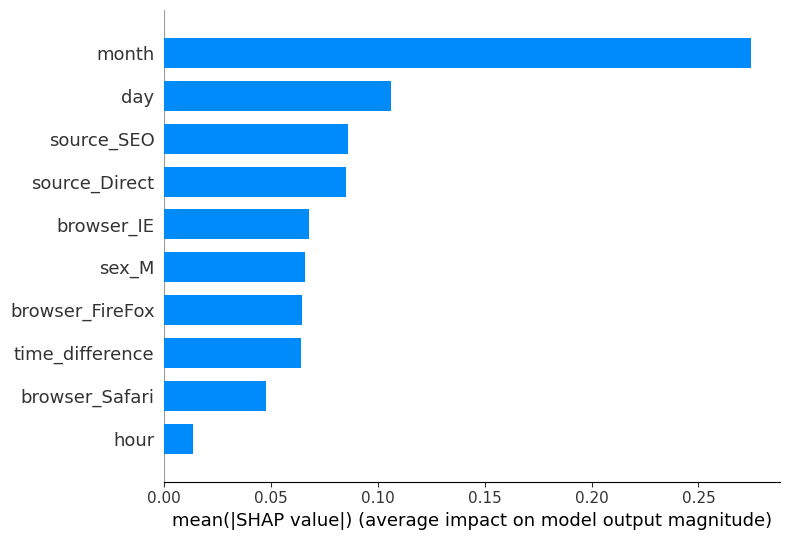

In [70]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_fraud[:100], feature_names=X_fraud.columns, max_display=10,plot_type="bar")

### ***2. Decision Tree SHAP***

#### ***2.1 Credit Card Model***

In [71]:
# Load model for credit card data
with open('../data/tree_credit.pkl', 'rb') as file:
    tree_credit = pickle.load(file)

In [72]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_credit_resampled, 100)  # Or use shap.kmeans(X_train_fraud_resampled, 100)

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(tree_credit.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_credit[:100])  # Limit to the first 100 samples to speed up

100%|██████████| 100/100 [01:21<00:00,  1.23it/s]


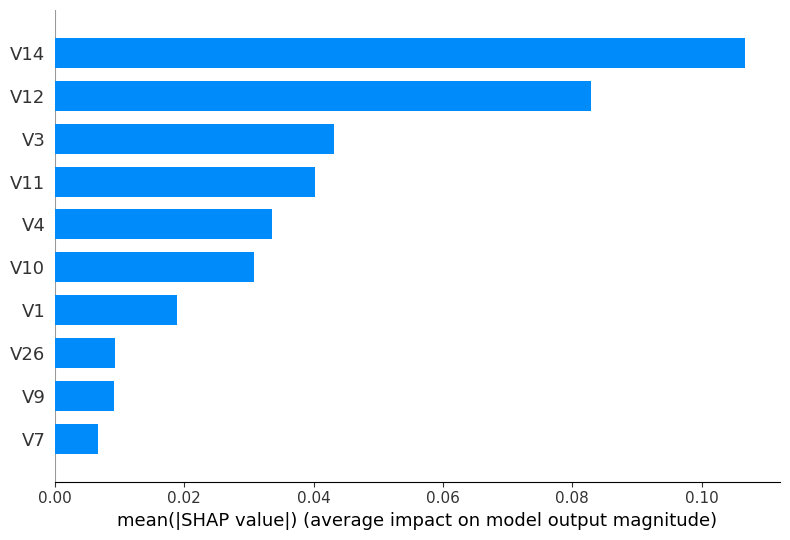

In [73]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_credit[:100], feature_names=X_credit.columns, max_display=10,plot_type="bar")

#### ***2.2 Fraud Data Model***

In [74]:
# Load model for credit card data
with open('../data/tree_fraud.pkl', 'rb') as file:
    tree_fraud = pickle.load(file)

In [75]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_fraud_resampled, 100) 

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(tree_fraud.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_fraud[:100])  # Limit to the first 100 samples to speed up

100%|██████████| 100/100 [01:02<00:00,  1.59it/s]


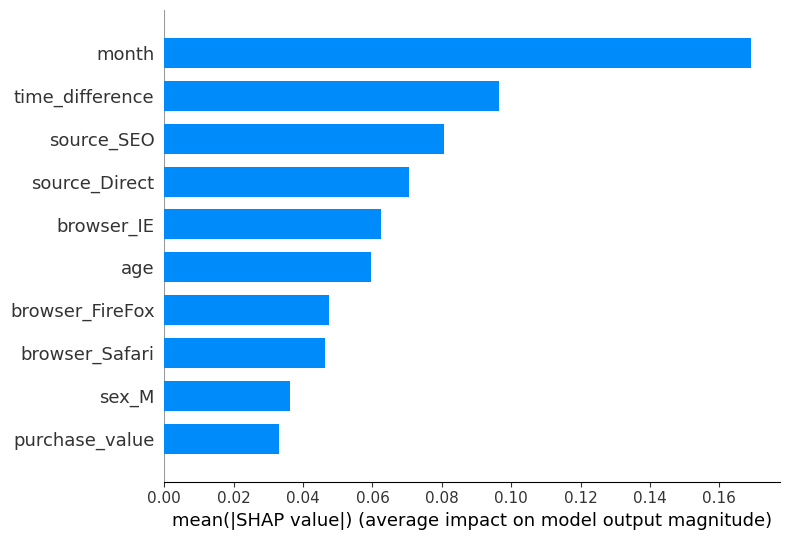

In [76]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_fraud[:100], feature_names=X_fraud.columns, max_display=10,plot_type="bar")

### ***3. Random Forest Model SHAP***

#### ***3.1 Credit Card Model***

In [77]:
# Load model for credit card data
with open('../data/rfs_credit.pkl', 'rb') as file:
    rfs_credit = pickle.load(file)

In [78]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_credit_resampled, 100)  # Or use shap.kmeans(X_train_fraud_resampled, 100)

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(rfs_credit.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_credit[:100])  # Limit to the first 100 samples to speed up

100%|██████████| 100/100 [03:14<00:00,  1.94s/it]


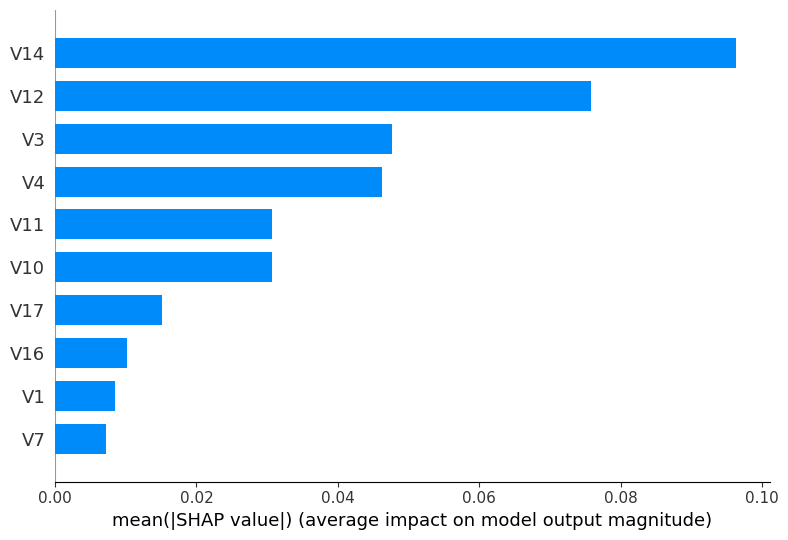

In [79]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_credit[:100], feature_names=X_credit.columns, max_display=10,plot_type="bar")

#### ***3.2 Fraud Data Model***

In [80]:
# Load model for credit card data
with open('../data/rfs_fraud.pkl', 'rb') as file:
    rfs_fraud = pickle.load(file)

In [81]:
# Reduce the background data using shap.sample or shap.kmeans (with 100 samples)
background_sample = shap.sample(X_train_fraud_resampled, 100) 

# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.KernelExplainer(rfs_fraud.predict, background_sample)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_fraud[:100])  # Limit to the first 100 samples to speed up

100%|██████████| 100/100 [05:39<00:00,  3.40s/it]


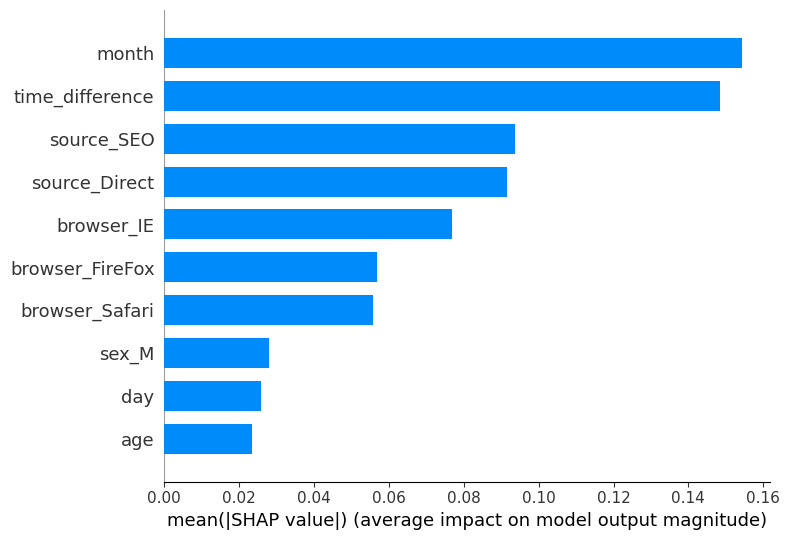

In [82]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_fraud[:100], feature_names=X_fraud.columns, max_display=10,plot_type="bar")

### ***4. XGBoost Model SHAP***

#### ***4.1 Credit Card Model***

In [83]:
# Load model for credit card data
with open('../data/xgboost_credit.pkl', 'rb') as file:
    xgb_credit = pickle.load(file)

In [ ]:
# SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.TreeExplainer(xgb_credit)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_credit[:100])  # Limit to the first 100 samples to speed up

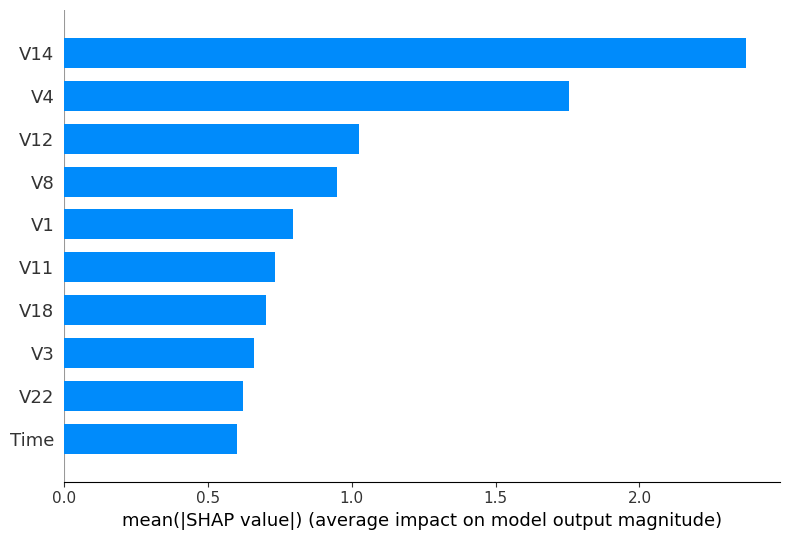

In [87]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_credit[:100], feature_names=X_credit.columns, max_display=10,plot_type="bar")

#### ***4.2 Fraud Data Model***

In [88]:
# Load model for credit card data
with open('../data/xgboost_fraud.pkl', 'rb') as file:
    xgb_fraud = pickle.load(file)

In [ ]:
 # SHAP explanation for fraud dataset using KernelExplainer with a reduced background
explainer = shap.TreeExplainer(xgb_fraud)

# Calculate SHAP values using fewer test samples (limit if needed for speed)
shap_values = explainer.shap_values(X_test_fraud[:100])  # Limit to the first 100 samples to speed up

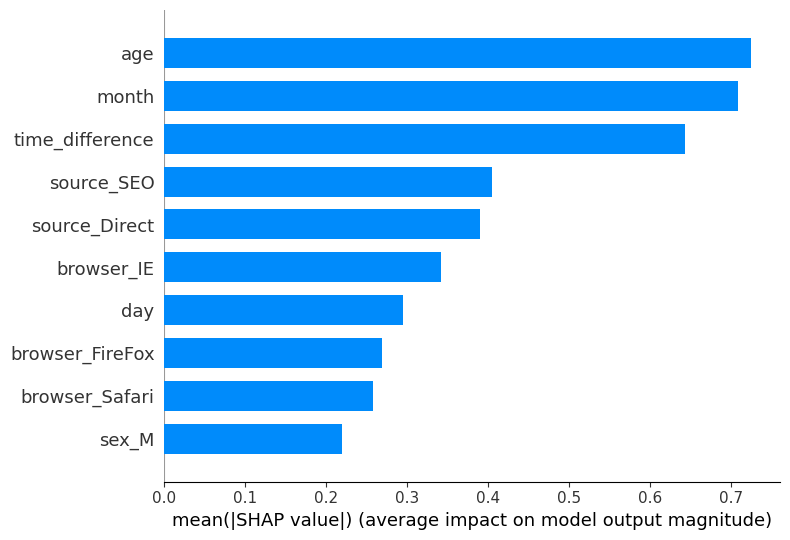

In [92]:
# Now, summarize only the top 10 most important features
shap.summary_plot(shap_values, X_test_fraud[:100], feature_names=X_fraud.columns, max_display=10,plot_type="bar")